In [1]:
import scipy.io
import skimage.io
import mat73
import matplotlib.pyplot as plt
import skimage.transform
import numpy as np
import seaborn as sns
import glob
from IPython import display
import time
import os
import pandas as pd
import itertools
import scipy.stats

In [2]:
def draw_scatter(GT_img_file, NG_img_file):
    GT_img=skimage.io.imread(GT_img_file)
    NZ_img=skimage.io.imread(NZ_img_file)
    
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.figure(figsize=(12, 12)) 
    plt.subplot(1,3,1); sns.scatterplot(x=GT_img[...,0].reshape(-1), y=NZ_img[...,0].reshape(-1));plt.title('R scatter')
    plt.subplot(1,3,2); sns.scatterplot(x=GT_img[...,1].reshape(-1), y=NZ_img[...,1].reshape(-1));plt.title('G scatter')
    plt.subplot(1,3,3); sns.scatterplot(x=GT_img[...,2].reshape(-1), y=NZ_img[...,2].reshape(-1));plt.title('B scatter')
    return

In [3]:
# raw_file_list=[glob.glob(el+'/GT_RAW_*.MAT')[0] for el in glob.glob('./SIDD_Small_Raw_Only/Data/*')]
# img_file_list=[glob.glob(el+'/GT_SRGB_*.PNG')[0] for el in glob.glob('./SIDD_Small_sRGB_Only/Data/*')]
# meta_file_list=[glob.glob(el+'/METADATA_RAW_*.MAT')[0] for el in glob.glob('./SIDD_Small_Raw_Only/Data/*')]
GT_raw_file_list=[glob.glob(el+'/*GT_RAW_*.MAT') for el in glob.glob('./SIDD_Medium_Raw/Data/*')]
GT_raw_file_list=list(itertools.chain(*GT_raw_file_list))
GT_img_file_list=[glob.glob(el+'/*GT_SRGB_*.PNG') for el in glob.glob('./SIDD_Medium_Srgb/Data/*')]
GT_img_file_list=list(itertools.chain(*GT_img_file_list))
meta_file_list=[glob.glob(el+'/*METADATA_RAW_*.MAT') for el in glob.glob('./SIDD_Medium_Raw/Data/*')]
meta_file_list=list(itertools.chain(*meta_file_list))

In [4]:
NZ_raw_file_list=[glob.glob(el+'/*NOISY_RAW_*.MAT') for el in glob.glob('./SIDD_Medium_Raw/Data/*')]
NZ_raw_file_list=sorted(list(itertools.chain(*NZ_raw_file_list)))
NZ_img_file_list=[glob.glob(el+'/*NOISY_SRGB_*.PNG') for el in glob.glob('./SIDD_Medium_Srgb/Data/*')]
NZ_img_file_list=sorted(list(itertools.chain(*NZ_img_file_list)))


In [5]:
df_raw=pd.DataFrame([el.split('\\')[1].split('_') for el in GT_raw_file_list],
                   columns=['scene_instance_number', 'scene_number', 'smartphone_code', 'ISO_level', 'shutter_speed', 'illuminant_temperature', 'illuminant_brightness_code'])
df_raw['GT_raw_filepath']=GT_raw_file_list
df_raw['GT_img_filepath']=GT_img_file_list
df_raw['meta_filepath']=meta_file_list
df_raw['NZ_raw_filepath']=NZ_raw_file_list
df_raw['NZ_img_filepath']=NZ_img_file_list
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   scene_instance_number       320 non-null    object
 1   scene_number                320 non-null    object
 2   smartphone_code             320 non-null    object
 3   ISO_level                   320 non-null    object
 4   shutter_speed               320 non-null    object
 5   illuminant_temperature      320 non-null    object
 6   illuminant_brightness_code  320 non-null    object
 7   GT_raw_filepath             320 non-null    object
 8   GT_img_filepath             320 non-null    object
 9   meta_filepath               320 non-null    object
 10  NZ_raw_filepath             320 non-null    object
 11  NZ_img_filepath             320 non-null    object
dtypes: object(12)
memory usage: 30.1+ KB


In [6]:
(df_raw.iloc[:,-5].apply(lambda x: x.split('\\')[1])==df_raw.iloc[:,-1].apply(lambda x: x.split('\\')[1])).sum()

320

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

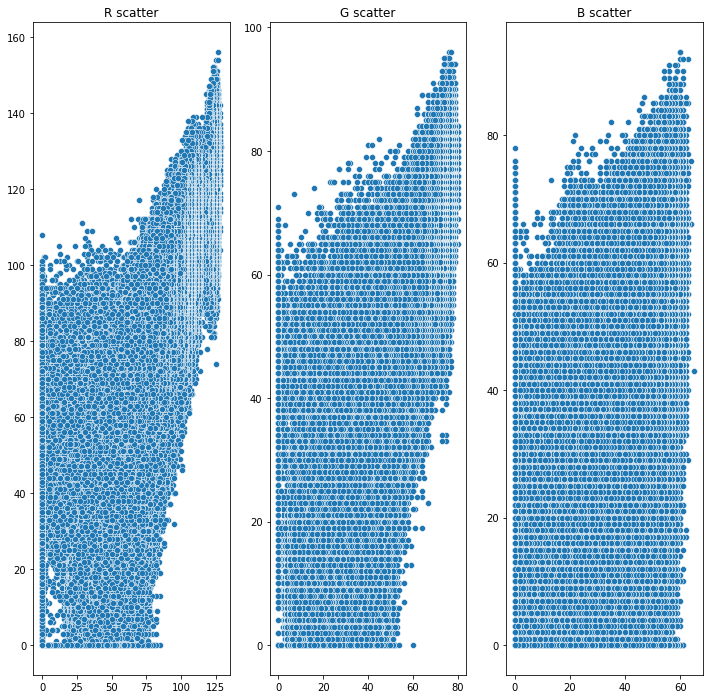

In [7]:
smartphone_code='IP'

spec_GT_img_file_list=df_raw.groupby('smartphone_code').get_group(smartphone_code).iloc[:,-4].values
spec_NZ_img_file_list=df_raw.groupby('smartphone_code').get_group(smartphone_code).iloc[:,-1].values

for GT_img_file,NZ_img_file in zip(spec_GT_img_file_list, spec_NZ_img_file_list):
    draw_scatter(GT_img_file, NZ_img_file)
    plt.show()
    break#input()

In [8]:
if 1:
    GT_img=skimage.io.imread(GT_img_file)
    NZ_img=skimage.io.imread(NZ_img_file)


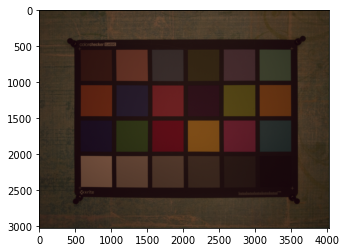

In [9]:
plt.imshow(GT_img)

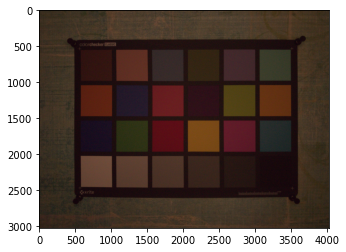

In [10]:
plt.imshow(NZ_img)

In [11]:
df=GT_img.astype(np.int32)-NZ_img.astype(np.int32)

<AxesSubplot:ylabel='Count'>

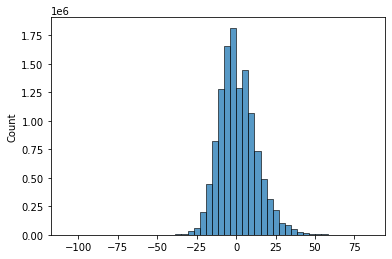

In [12]:
sns.histplot(df[...,0].reshape(-1), bins=50)

In [13]:
print(GT_img_file, NZ_img_file)

./SIDD_Medium_Srgb/Data\0028_001_IP_00100_00160_5500_N\0028_GT_SRGB_010.PNG ./SIDD_Medium_Srgb/Data\0028_001_IP_00100_00160_5500_N\0028_NOISY_SRGB_010.PNG


<AxesSubplot:>

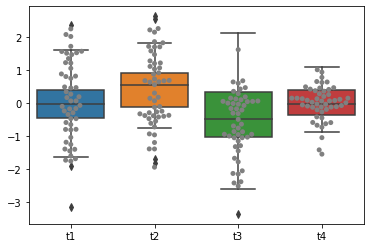

In [14]:
sns.boxplot(x=['t1']*50+['t2']*50+['t3']*50+['t4']*50, 
            y=np.concatenate([np.random.randn(50,),np.random.randn(50,)+0.5,np.random.randn(50,)-0.5,np.random.randn(50,)*0.5,], axis=0))
sns.swarmplot(x=['t1']*50+['t2']*50+['t3']*50+['t4']*50, 
            y=np.concatenate([np.random.randn(50,),np.random.randn(50,)+0.5,np.random.randn(50,)-0.5,np.random.randn(50,)*0.5,], axis=0), color='0.5')

In [15]:
tips = sns.load_dataset("tips")

In [16]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

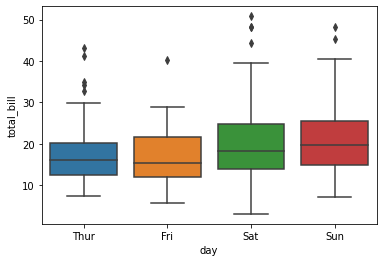

In [17]:
 sns.boxplot(x=tips["day"], y=tips["total_bill"])

In [ ]:
scipy.stats.spearmanr()